In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [111]:
df = pd.read_csv('data.csv')

## 1. Understand & Prepare the data

In [112]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [113]:
df['diagnosis'].unique() # we see that our target variable has 2 types either Malignant or Benign, we can one-hot encode or label or custom map

array(['M', 'B'], dtype=object)

In [114]:
df.info() # we notice that feature Unmaed: 32 is full of nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [115]:
df = df.drop('Unnamed: 32', axis=1)

In [116]:
df['id'].duplicated().sum() # there is no duplicated data

np.int64(0)

In [117]:
df = df.drop('id', axis=1)

In [118]:
df.columns # notice there are 3 types of features _mean, _se, _worst
# each type serve a purpose
# mean: average value, 
# se: StandardError: how much a mean sample will vary from true population mean, AKA instability of the feature6
# worst: mean of the three largest values
# since each type provide a unique context we will keep all the 3 types, ML model would analyze how these 3 values change together and how they impact target feature

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [119]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])
df = df.drop('diagnosis', axis=1) # B = 0, M = 1
df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## checking features relationship

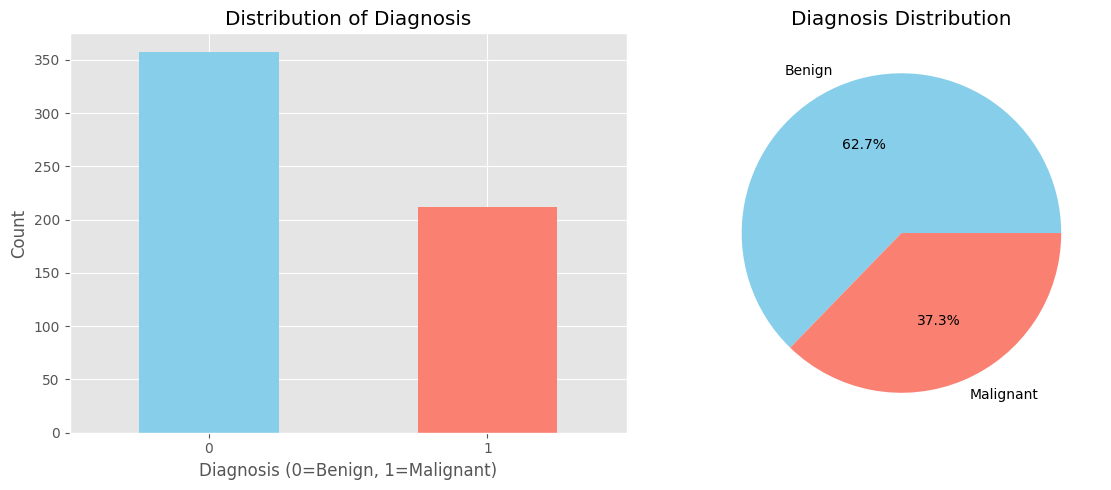

In [184]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['diagnosis_encoded'].value_counts().plot(kind='bar',  color=['skyblue', 'salmon'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (0=Benign, 1=Malignant)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(df['diagnosis_encoded'].value_counts(), labels=['Benign', 'Malignant'], 
        autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Diagnosis Distribution')

plt.tight_layout()
plt.show()

## Feature Selection

In [120]:
X = df.drop('diagnosis_encoded', axis=1)
y = df['diagnosis_encoded']

Feature Selection: VarianceThrehold Method

In [121]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0) #Threshold=0: any feature that has same value for all rows will be dropped
X_clean = selector.fit_transform(X)

remaining_features = X.columns[selector.get_support()] #returns columns that survived the selection
X_clean = pd.DataFrame(X_clean, columns=remaining_features)  #X_clean contain the features that survived the feature selection

In [122]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores
mi_scores = mutual_info_classif(X_clean, y, random_state=42)
mi_series = pd.Series(mi_scores, index=X_clean.columns).sort_values(ascending=False)

# Ranking correlation scores
corr_scores = X_clean.corrwith(y).abs().sort_values(ascending=False)

print("Mutual Information Scores:\n", mi_series)
print("\nCorrelation Scores:\n", corr_scores)

# we inspect and drop features with extremely low scores from both lists
# For example, if a feature has a MI score close to 0 and a corr score close to 0
low_scoring_features = mi_series[mi_series < 0.05].index.intersection(corr_scores[corr_scores < 0.05].index)
X_filtered = X_clean.drop(columns=low_scoring_features)
# drop features that are lower than 0.05 ranked by both mutual information score and correlation score
# Wont hurt if we check manually to remove some features no ?

Mutual Information Scores:
 perimeter_worst            0.471842
area_worst                 0.464313
radius_worst               0.451230
concave points_mean        0.438806
concave points_worst       0.436255
perimeter_mean             0.402361
concavity_mean             0.375447
radius_mean                0.362276
area_mean                  0.360023
area_se                    0.340759
concavity_worst            0.315259
perimeter_se               0.275614
radius_se                  0.249301
compactness_worst          0.225211
compactness_mean           0.213439
concave points_se          0.125415
texture_worst              0.120331
concavity_se               0.117440
texture_mean               0.096540
smoothness_worst           0.095697
symmetry_worst             0.095435
smoothness_mean            0.079740
compactness_se             0.073390
symmetry_mean              0.065721
fractal_dimension_worst    0.065041
fractal_dimension_se       0.039235
smoothness_se              0.015651


In [123]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# we train xgboost model so we can get the feature importance which will help in selecting features
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Extract importance scores
importance_scores = model.get_booster().get_score(importance_type='gain')
sorted_importance = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

print("\nXGBoost Feature Importance (Gain):")
for feature, score in sorted_importance:
    print(f"{feature}: {score:.4f}")



XGBoost Feature Importance (Gain):
concave points_worst: 24.8230
concave points_mean: 22.3532
radius_worst: 8.8696
perimeter_worst: 8.3918
area_worst: 6.0930
perimeter_se: 2.3849
texture_worst: 1.9999
radius_mean: 1.6847
texture_mean: 1.5321
concavity_worst: 1.4884
area_mean: 1.1766
concavity_mean: 1.0012
area_se: 0.8842
concavity_se: 0.8060
smoothness_worst: 0.6858
radius_se: 0.6848
smoothness_se: 0.4841
fractal_dimension_se: 0.4753
compactness_se: 0.4311
smoothness_mean: 0.3836
symmetry_worst: 0.3488
compactness_mean: 0.2329
compactness_worst: 0.1382
concave points_se: 0.0647
symmetry_mean: 0.0603


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Features: 1, Accuracy: 0.8860
Features: 2, Accuracy: 0.8596
Features: 3, Accuracy: 0.9474


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actio

Features: 4, Accuracy: 0.9474
Features: 5, Accuracy: 0.9561


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Features: 6, Accuracy: 0.9474
Features: 7, Accuracy: 0.9561
Features: 8, Accuracy: 0.9561
Features: 9, Accuracy: 0.9474


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actio

Features: 10, Accuracy: 0.9561
Features: 11, Accuracy: 0.9561
Features: 12, Accuracy: 0.9649


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Features: 13, Accuracy: 0.9561
Features: 14, Accuracy: 0.9561
Features: 15, Accuracy: 0.9649


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Features: 16, Accuracy: 0.9561
Features: 17, Accuracy: 0.9561


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Features: 18, Accuracy: 0.9649
Features: 19, Accuracy: 0.9649
Features: 20, Accuracy: 0.9561


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Features: 21, Accuracy: 0.9649
Features: 22, Accuracy: 0.9649


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Features: 23, Accuracy: 0.9649
Features: 24, Accuracy: 0.9649
Features: 25, Accuracy: 0.9561


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:31:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


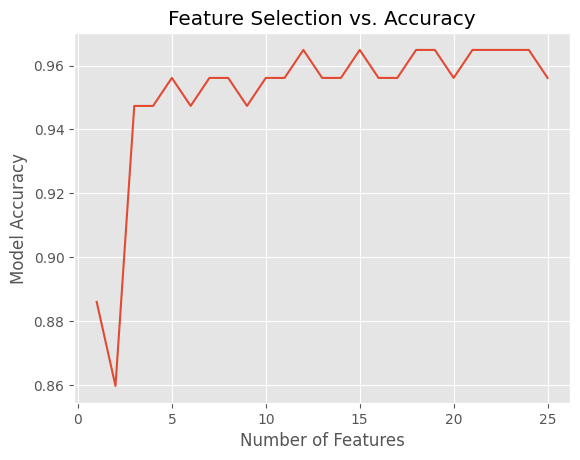

In [124]:
from sklearn.metrics import accuracy_score

# Create a list of features to test, from most important to least
features_to_test = [f[0] for f in sorted_importance]
performance_results = {}

# Iterate through different feature sets
for i in range(1, len(features_to_test) + 1):
    current_features = features_to_test[:i]
    X_subset_train = X_train[current_features]
    X_subset_test = X_test[current_features]

    # Retrain a new model with the subset of features
    new_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    new_model.fit(X_subset_train, y_train)
    y_pred = new_model.predict(X_subset_test)

    # Record the performance
    accuracy = accuracy_score(y_test, y_pred)
    performance_results[i] = accuracy
    print(f"Features: {i}, Accuracy: {accuracy:.4f}")

# Analyze the results to find the best feature set
# Plotting the results helps visualize the trade-off
import matplotlib.pyplot as plt

plt.plot(list(performance_results.keys()), list(performance_results.values()))
plt.xlabel('Number of Features')
plt.ylabel('Model Accuracy')
plt.title('Feature Selection vs. Accuracy')
plt.show()

Feature Selection: Summary

we find that the number of features with highest model accuracy are 12, 15, 18, 19, 21, 22, 23, and 24 reaching accuracy of 0.9649
we choose the top 12 features because it will make the model less prone to overfitting and faster to run with the same performance as higher feature numbers

features are:
1. concave points_worst: 24.8230
2. concave points_mean: 22.3532
3. radius_worst: 8.8696
4. perimeter_worst: 8.3918
5. area_worst: 6.0930
6. perimeter_se: 2.3849
7. texture_worst: 1.9999
8. radius_mean: 1.6847
9. texture_mean: 1.5321
10. concavity_worst: 1.4884
11. area_mean: 1.1766
12. concavity_mean: 1.0012

In [125]:
X_new = X_filtered[['concave points_worst', 'concave points_mean', 'radius_worst',
           'perimeter_worst', 'area_worst', 'perimeter_se',
           'texture_worst', 'radius_mean', 'texture_mean', 
           'concavity_worst', 'area_mean', 'concavity_mean']]

In [126]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   concave points_worst  569 non-null    float64
 1   concave points_mean   569 non-null    float64
 2   radius_worst          569 non-null    float64
 3   perimeter_worst       569 non-null    float64
 4   area_worst            569 non-null    float64
 5   perimeter_se          569 non-null    float64
 6   texture_worst         569 non-null    float64
 7   radius_mean           569 non-null    float64
 8   texture_mean          569 non-null    float64
 9   concavity_worst       569 non-null    float64
 10  area_mean             569 non-null    float64
 11  concavity_mean        569 non-null    float64
dtypes: float64(12)
memory usage: 53.5 KB


## Models Training

In [127]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

numerical_cols = X_new.select_dtypes(include='Float64').columns.tolist()

Numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('Scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('numerical', Numerical_pipeline, numerical_cols),
])
def model_pip(instance):
    model_pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('sampler', SMOTE(random_state=42)),
        ('model', instance )
    ])
    return model_pipeline

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier

In [131]:
Models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbor': KNN(),
    'XGBoost': XGBClassifier(random_state=42),
    'Random Forest': RFC(random_state=42)
}

In [132]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [133]:
fitted_models = {}

for name, instance in Models.items():
    model_pipeline = model_pip(instance)
    model_pipeline.fit(X_train, y_train)
    fitted_models[name] = model_pipeline

    # Evaluate on the TEST set
    y_pred_test = model_pipeline.predict(X_test)
    test_report = classification_report(y_test, y_pred_test)

    # Evaluate on the TRAINING set
    y_pred_train = model_pipeline.predict(X_train)
    train_report = classification_report(y_train, y_pred_train)

    fitted_models[name] = {train_report}

    print(f'Evaluating the following model: {name}')
    print(f'Training Report: {train_report}\n')
    print(f'Test Report: {test_report}, {'=='*50} \n')

Evaluating the following model: Logistic Regression
Training Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98       286
           1       0.95      0.96      0.96       169

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455


Test Report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114
, ==================================================================================================== 

Evaluating the following model: Support Vector Machine
Training Report:               precision    recall  f1-score   support

           0       0.99      0.9

we notice some models are overfitting so we use validation score to confirm it and pick the top 4 models with val accurancy or small gap between val score and accurancy

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
for name, instance in Models.items():
    model_pipeline = model_pip(instance)
    cv_scores = cross_val_score(model_pipeline, X_new, y, cv=5, scoring='accuracy')
    print(f"Validation for {name}: ")
    print("Validation scores for each fold:", cv_scores, "\n")
    print(f"Mean Validation Score:", round(cv_scores.mean(), 5), "\n")

Validation for Logistic Regression: 
Validation scores for each fold: [0.96491228 0.95614035 0.98245614 0.95614035 0.96460177] 

Mean Validation Score: 0.96485 

Validation for Support Vector Machine: 
Validation scores for each fold: [0.94736842 0.95614035 0.98245614 0.95614035 0.96460177] 

Mean Validation Score: 0.96134 

Validation for Decision Tree: 
Validation scores for each fold: [0.90350877 0.93859649 0.93859649 0.93859649 0.91150442] 

Mean Validation Score: 0.92616 

Validation for K-Nearest Neighbor: 
Validation scores for each fold: [0.93859649 0.95614035 0.97368421 0.95614035 0.94690265] 

Mean Validation Score: 0.95429 

Validation for XGBoost: 
Validation scores for each fold: [0.94736842 0.96491228 0.99122807 0.96491228 0.96460177] 

Mean Validation Score: 0.9666 

Validation for Random Forest: 
Validation scores for each fold: [0.94736842 0.93859649 0.98245614 0.96491228 0.97345133] 

Mean Validation Score: 0.96136 



the top 4 models: 
1. XGBoost 0.966,
2. Logistic Regression 0.964, 
3. Random FOrest 0.961, 
4. SVM 0.961

these models are the models that will get hyper parameter tuned

## Hyperparamter Tuning

In [136]:
from sklearn.model_selection import GridSearchCV
#from cuml.ensemble import RandomForestClassifier as cuRF

In [164]:
models_2_tune = {
    'Logistic Regression': {
        'instance': LogisticRegression(),
        'para_grid':{
            'model__C': [0.001, 0.1, 1, 10, 100],
            'model__penalty': [None, 'l2', 'l1', 'elasticnet'],
            'model__solver': ['saga']
        }
    },
    
    'SVM': {
        'instance': SVC(probability=True),
        'para_grid':{
            'model__C': [0.001, 0.1, 1, 10, 100],
            'model__kernel': ['rbf', 'linear', 'sigmoid'],
            'model__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
        }
    },

    'XGBoost': {
        'instance': XGBClassifier(
         tree_method="hist",
         device="cuda",
         eval_metric="logloss"
     ),
        'para_grid': {
            'model__n_estimators': [400], # start: [300, 400, 500] --> [400, 500, 600]
            'model__max_depth': [3], # start: [4, 6, 8] --> [2, 3, 4]
            'model__learning_rate': [0.01], # start: [0.01, 0.1, 0.2]
            'model__subsample': [0.8], #start: [0.8, 1.0] --> [0.8, 0.5]
            'model__reg_alpha': [0],
            'model__reg_lambda': [1] # start: [1, 10, 50]
        }
    },

    'Random Forest': { 
        'instance': RFC(),
        'para_grid':{ 
            'model__n_estimators': [500], #[300, 500, 600, 700]
            'model__max_depth': [None],# [None, 10, 20]
            'model__min_samples_split': [2], # [2, 5]
            'model__min_samples_leaf': [1], # [1, 2]
            'model__max_features': ['sqrt'], # ['sqrt', 'log2', None]
            'model__bootstrap': [True]    #  [True, False]           
        }   
    }
}
scoring = {
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

In [138]:
from sklearn.metrics import f1_score

In [165]:
tuned_models = {}
for name in models_2_tune:
    model_pipeline = model_pip(models_2_tune[name]['instance'])

    grid_search = GridSearchCV(
        model_pipeline,
        param_grid=models_2_tune[name]['para_grid'],
        cv=5,
        scoring= scoring,
        refit='f1',
        n_jobs=1, #if possible make it -1 so it can use all avaliable cpu cores to do compu in parrarel
        verbose=1
    )

    grid_search.fit(X_train, y_train)
    print('=='*40, '\n',"fitting model: ", name)
    print("Best params:", grid_search.best_params_)
    print("Best f1:", grid_search.best_score_)
    print("All scores per split:", grid_search.cv_results_,'\n', '=='*40)
    
    tuned_models[name] = {
    'best_estimator': grid_search.best_estimator_,
    'best_params': grid_search.best_params_,
    'cv_score': grid_search.best_score_,
    'test_score': f1_score(y_test, grid_search.best_estimator_.predict(X_test))
}

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_

 fitting model:  Logistic Regression
Best params: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'saga'}
Best f1: 0.9560852957783904
All scores per split: {'mean_fit_time': array([0.02265525, 0.01047626, 0.00922899, 0.00720453, 0.01234679,
       0.01086736, 0.0134099 , 0.00532804, 0.01416011, 0.0121007 ,
       0.01402912, 0.00578146, 0.01180182, 0.01286283, 0.01461477,
       0.00689578, 0.0161808 , 0.01228929, 0.01367755, 0.00541344]), 'std_fit_time': array([0.01651221, 0.00186502, 0.00268847, 0.00098255, 0.00073425,
       0.00269329, 0.00095263, 0.00049014, 0.00212371, 0.00147812,
       0.00096931, 0.00059857, 0.00067532, 0.00155715, 0.00193337,
       0.00112622, 0.00235439, 0.00072699, 0.00063747, 0.00064595]), 'mean_score_time': array([0.01060853, 0.00996881, 0.00976481, 0.        , 0.00788307,
       0.00739479, 0.00769711, 0.        , 0.00759716, 0.00753975,
       0.00797749, 0.        , 0.00692167, 0.00790129, 0.00745287,
       0.        , 0.00965552, 0.00769644

In [166]:
tuned_models['SVM']['best_params']

{'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

In [ ]:
for name in tuned_models.keys():
    i = 0
    print(name, "CV score: " ,tuned_models[name]['cv_score'])
    print(name, "test score: " ,tuned_models[name]['test_score'], '\n')

Logistic Regression CV score:  0.9560852957783904
Logistic Regression test score:  0.9647058823529412 

SVM CV score:  0.9675140919443702
SVM test score:  0.9534883720930233 

XGBoost CV score:  0.9673331783306207
XGBoost test score:  0.9411764705882353 

Random Forest CV score:  0.9613594365833171
Random Forest test score:  0.9411764705882353 



Logistic Regression is the most stable — slightly lower CV but best test performance.

SVM did great in CV but lost on test

(RF, XGB) are powerful but dataset might not be large enough to fully benefit. they’re overfitting.

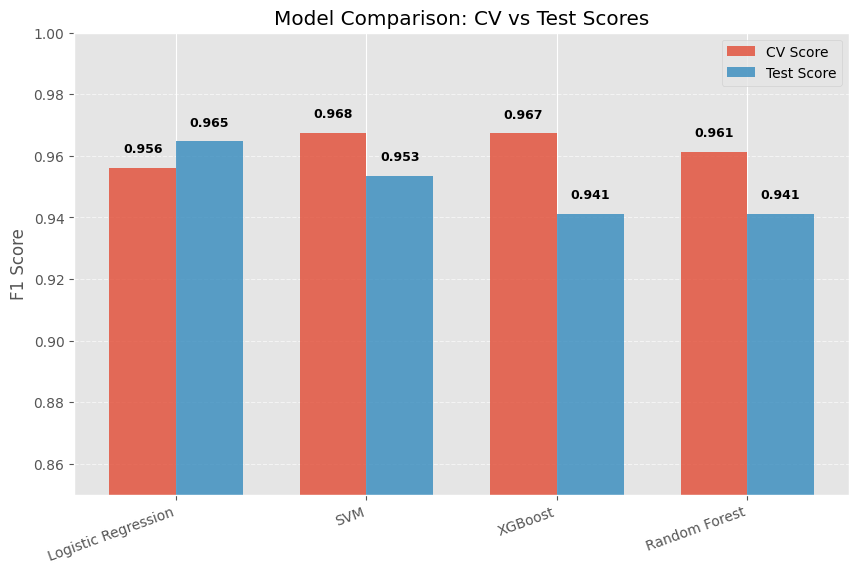

In [180]:
model_names = list(tuned_models.keys())
cv_scores = [tuned_models[m]['cv_score'] for m in model_names]
test_scores = [tuned_models[m]['test_score'] for m in model_names]

x = np.arange(len(model_names))

plt.figure(figsize=(10,6))
plt.bar(x - width/2, cv_scores, width, label="CV Score", alpha=0.8)
plt.bar(x + width/2, test_scores, width, label="Test Score", alpha=0.8)

plt.xticks(x, model_names, rotation=20, ha="right")
plt.ylabel("F1 Score")
plt.ylim(0.85, 1.0)
plt.title("Model Comparison: CV vs Test Scores")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

for i, (cv, test) in enumerate(zip(cv_scores, test_scores)):
    plt.text(i - width/2, cv + 0.005, f"{cv:.3f}", ha="center", fontsize=9, weight="bold")
    plt.text(i + width/2, test + 0.005, f"{test:.3f}", ha="center", fontsize=9, weight="bold")

plt.show()

## Conclusion

reliable and most accurate model: Logistic Regression.

BUT we can keep SVM in play (but require more tuning)
if we have larger dataset we can try again with RF and XGB since it has the most potiential 

In [185]:
import joblib

# save logistic
final_model = tuned_models['Logistic Regression']['best_estimator']

joblib.dump(final_model, "LR_model.pkl")
print("Model saved as LR_model.pkl")

Model saved as LR_model.pkl
